# **9 Regularization Techniques**
### The primary reason to apply regularization techniques is to prevent overfitting in machine learning models, particularly in complex models like neural networks. Overfitting occurs when a model becomes too tailored to the training data, capturing noise and random fluctuations rather than general patterns. As a result, the model's performance on unseen data (i.e., the test data) degrades, leading to poor generalization.

### Regularization techniques aim to address overfitting by adding additional constraints to the model during training. These constraints encourage the model to focus on learning the essential patterns in the data while discouraging it from fitting noise or irrelevant details. By doing so, regularization improves the model's ability to generalize well to new, unseen data, which is the ultimate goal in machine learning.

## **Weight Decay Regularization:**
### Weight decay, also known as L2 regularization, is a technique used to prevent overfitting in neural networks by penalizing large weights. In weight decay, an additional term is added to the loss function that depends on the magnitude of the weights. The regularization term is proportional to the squared sum of all weights in the network.

### The regularization term is defined as: Regularization_term =

### where  is the regularization strength, and  represents the weights of the network.

### The role of weight decay in preventing overfitting is to discourage the model from relying too much on any particular feature or weight. By penalizing large weights, weight decay encourages the network to use smaller weights, resulting in a simpler model with reduced complexity. This, in turn, helps the model generalize better to unseen data and reduces the risk of overfitting.

### To apply weight decay to a neural network during training, you need to add the regularization term to the loss function and adjust the learning process accordingly.

## **Dropout Regularization:**
### Dropout is a regularization technique that addresses overfitting by randomly deactivating (i.e., setting to zero) a fraction of neurons during training. In each training iteration, individual neurons are dropped with a certain probability, while during testing or inference, all neurons are active. This process effectively prevents complex co-adaptations among neurons, reducing the model's reliance on specific neurons and enhancing its generalization ability.

### The role of dropout in preventing overfitting is to create an ensemble effect during training, where different subsets of neurons are activated or deactivated in each iteration. This ensemble approach leads to a more robust model that generalizes better to unseen data.

### To apply dropout to a neural network is straightforward. You can add dropout layers after the activation functions in the hidden layers of your neural network.

1. Import libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

2. Load the CIFAR-10 dataset and preprocess the data.

In [24]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=180, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=180, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


3. Define a neural network model with dropout layers.

In [25]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 1536 )
        self.fc2 = nn.Linear(1536, 384)
        self.fc3 = nn.Linear(384, 96)
        self.fc4 = nn.Linear(96, 10)

        self.dropout = nn.Dropout(0.7)

    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = self.fc4(x)
        return x

net = Net()

4. Define the loss function (cross-entropy) and optimizer (Stochastic Gradient Descent with weight decay).

In [26]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, weight_decay=1e-4)

5. Train the model with weight decay and dropout for a certain number of epochs.

In [30]:
for epoch in range(200):  # Change the number of epochs as needed
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 200 == 199:  # Print every 200 mini-batches
            print(f"[{epoch + 1}, {i + 1}] Loss: {running_loss / 200:.3f}")
            running_loss = 0.0

print("Finished Training")

[1, 200] Loss: 1.795
[2, 200] Loss: 1.771
[3, 200] Loss: 1.743
[4, 200] Loss: 1.729
[5, 200] Loss: 1.717
[6, 200] Loss: 1.694
[7, 200] Loss: 1.677
[8, 200] Loss: 1.661
[9, 200] Loss: 1.648
[10, 200] Loss: 1.636
[11, 200] Loss: 1.618
[12, 200] Loss: 1.612
[13, 200] Loss: 1.593
[14, 200] Loss: 1.581
[15, 200] Loss: 1.563
[16, 200] Loss: 1.560
[17, 200] Loss: 1.535
[18, 200] Loss: 1.526
[19, 200] Loss: 1.517
[20, 200] Loss: 1.506
[21, 200] Loss: 1.494
[22, 200] Loss: 1.479
[23, 200] Loss: 1.473
[24, 200] Loss: 1.457
[25, 200] Loss: 1.451
[26, 200] Loss: 1.440
[27, 200] Loss: 1.434
[28, 200] Loss: 1.420
[29, 200] Loss: 1.417
[30, 200] Loss: 1.402
[31, 200] Loss: 1.401
[32, 200] Loss: 1.386
[33, 200] Loss: 1.370
[34, 200] Loss: 1.370
[35, 200] Loss: 1.354
[36, 200] Loss: 1.343
[37, 200] Loss: 1.338
[38, 200] Loss: 1.329
[39, 200] Loss: 1.317
[40, 200] Loss: 1.307
[41, 200] Loss: 1.305
[42, 200] Loss: 1.297
[43, 200] Loss: 1.287
[44, 200] Loss: 1.278
[45, 200] Loss: 1.271
[46, 200] Loss: 1.2

6. Evaluate the model's accuracy on the test set.

In [31]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on the test set: {(100 * correct / total):.2f}%")

Accuracy on the test set: 51.49%


7. Show an example of an image from the test dataset and its predicted class using the trained regularized model.

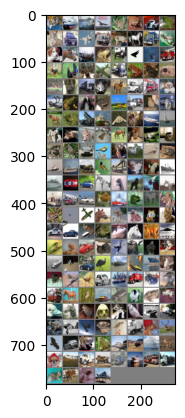

True Label:  tensor([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9,
        5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9,
        7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6,
        8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6,
        6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7, 4, 0, 6, 2, 1, 3, 0, 4, 2, 7,
        8, 3, 1, 2, 8, 0, 8, 3, 5, 2, 4, 1, 8, 9, 1, 2, 9, 7, 2, 9, 6, 5, 6, 3,
        8, 7, 6, 2, 5, 2, 8, 9, 6, 0, 0, 5, 2, 9, 5, 4, 2, 1, 6, 6, 8, 4, 8, 4,
        5, 0, 9, 9, 9, 8, 9, 9, 3, 7, 5, 0])
Predicted Label:  tensor([2, 9, 0, 8, 6, 6, 3, 6, 5, 1, 0, 9, 7, 7, 9, 5, 0, 0, 8, 6, 3, 0, 4, 1,
        2, 6, 4, 0, 9, 6, 6, 4, 2, 2, 9, 2, 7, 9, 9, 5, 0, 6, 3, 4, 0, 9, 3, 9,
        4, 4, 9, 4, 2, 3, 8, 8, 7, 8, 3, 3, 7, 6, 6, 4, 6, 2, 1, 8, 3, 9, 2, 6,
        8, 8, 0, 4, 9, 3, 6, 8, 8, 1, 1, 5, 3, 7, 3, 0, 8, 9, 0, 3, 8, 6, 4, 7,
        6, 0, 7, 3, 4, 5, 6, 3, 1, 1, 5, 6, 

In [32]:
def imshow(img):
    img = img / 2 + 0.5     # Unnormalize the image
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

for data in testloader:
    images, labels = data
    imshow(torchvision.utils.make_grid(images))  # Show the image
    print('True Label: ', labels)

    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    print('Predicted Label: ', predicted)
    break